In [67]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import traceback
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.ndimage import gaussian_filter1d
from skfeature.function.similarity_based import fisher_score


In [174]:
data = pd.read_csv(r"C:\Users\Rosco\OneDrive - James Cook University\Documents\Scripts\Bruker_preprocessed_sizeOrder.csv")

# remove last 50 columns due to noise from preprocessing
data = data.iloc[:,:-50] 

# make even category counts
print(data['species'].value_counts())
data=data.groupby('species',as_index = False,group_keys=False).apply(lambda s: s.sample(50,replace=False)) 
print(data['species'].value_counts())

## change wavenumber to wavelength
columnlabels = data.columns.values.tolist()
for i, item in enumerate(columnlabels):
    try: 
       wn = 10000000/float(item)
       wn = str(round(wn, 3))

       columnlabels[i] =  wn
    except Exception:
        pass
        # traceback.print_exc()
data.columns  = columnlabels #


#sort and reset row index  
data = data.sort_values(by=['classInt'])
data.reset_index(drop=True, inplace=True)


datasmall3 = data.drop(data[data.classInt > 3].index)

datasmall6 = data.drop(data[data.classInt > 6].index)


# select X and y 
X = data.values[:,5:].astype(float)
y = data['classInt'].to_numpy()


# set up various bits for plotting
labels = data.label.unique()
classInt = data.classInt.unique()
sizegroup = data.groupby('classInt')
df2 = sizegroup.apply(lambda x: x['sizes'].unique().item())
sizes = df2.to_numpy()


font = {'fontname':'Calibri'}
colors = plt.cm.tab10(np.linspace(0,1,10))


# data.to_csv(r"C:\Users\Rosco\OneDrive - James Cook University\Documents\Scripts\test.csv")



Anoplolepis      141
Carebara          57
Polyrhachis       52
Pheidole          50
Tetramorium       50
Crematogaster     50
Colobopsis        50
Camponotus        50
Oecophylla        50
Name: species, dtype: int64
Anoplolepis      50
Camponotus       50
Carebara         50
Colobopsis       50
Crematogaster    50
Oecophylla       50
Pheidole         50
Polyrhachis      50
Tetramorium      50
Name: species, dtype: int64


SPECTRA PLOT

C:\Users\Rosco\AppData\Local\Temp\ipykernel_10956\2552834254.py:10: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



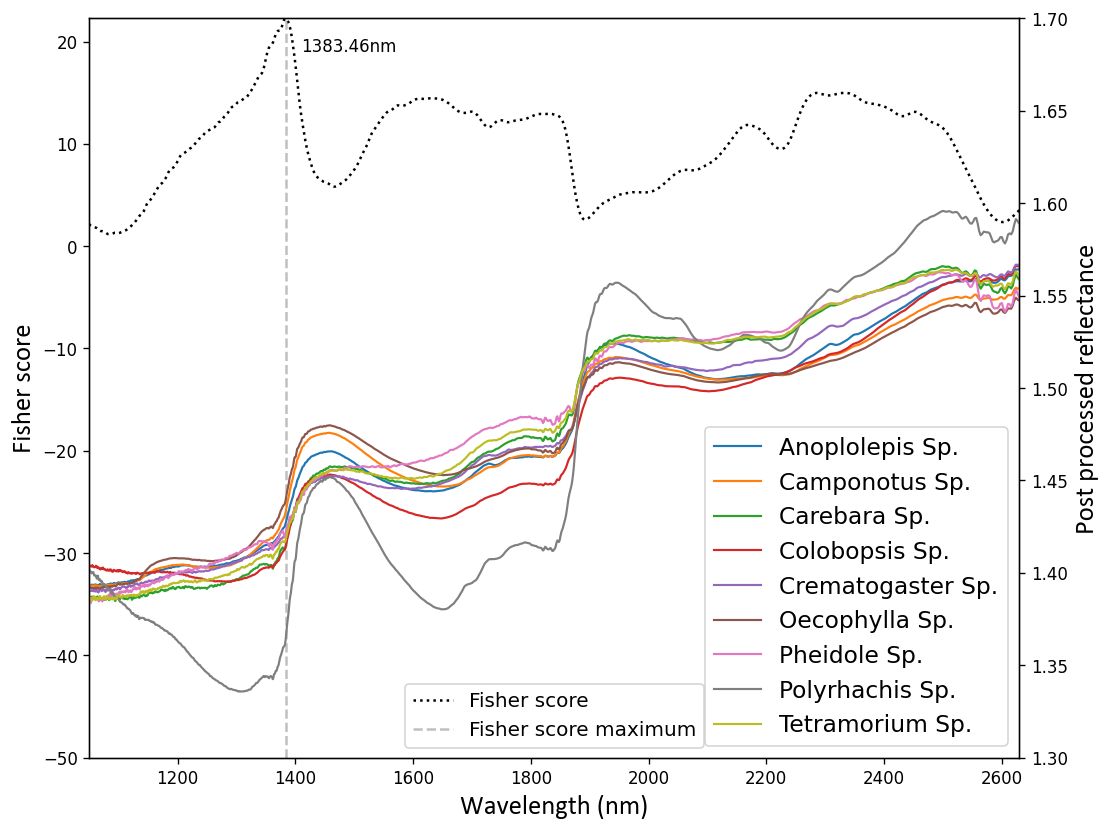

In [68]:
fig = plt.figure(dpi=120, figsize=(10,8))
plt.gcf().set_dpi(120)
plt.style.use('default')

ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()


grouped = data.groupby('species')
average = grouped.mean()
wl = list(average.columns[2:].astype('float32'))


fish = fisher_score.fisher_score(X, y) #returns rank directly instead of fisher score. so no need for feature_ranking
fishsmoothed = gaussian_filter1d(fish, sigma=5)
curve= ax1.plot(wl, fishsmoothed, linestyle='dotted', c='black')
ax1.axvline(x = wl[np.argmax(fishsmoothed[:])], color = 'gray', alpha=0.5, linestyle='dashed')


i=0
legend = []
for index, row in average.iterrows():
    specie = data.loc[data['species'] == index, 'label'].iloc[0]
    legend.append(specie+" Sp.")
    spectra = average.loc[index].to_numpy()
    ax2.plot(wl, (spectra[2:]), color=colors[i], linewidth=1.3)
    i = i+1

ax1.legend(['Fisher score', 'Fisher score maximum'], loc=8, prop= {"size":12})
ax2.legend(legend, loc=4, prop = { "size": 14 })
ax1.set_ylim([-50,np.max(fishsmoothed[:])])
ax2.set_xlim([1050,2630])
ax2.set_ylim([1.3,1.7])
ax1.annotate("%.2fnm" % wl[np.argmax(fishsmoothed[:-400])], xy=[1410,19])
ax1.set_xlabel("Wavelength (nm)",  **font, fontsize=16)
ax1.set_ylabel("Fisher score",  **font, fontsize=16)
ax2.set_ylabel("Post processed reflectance",  **font, fontsize=16)

plt.savefig('spectrafisher')
plt.show()

In [59]:
data

,species,site,label,classInt,sizes,800.431,800.678,800.926,801.173,801.421,...,2613.505,2616.142,2618.784,2621.432,2624.085,2626.744,2629.408,2632.078,2634.752,2637.433
0,Anoplolepis,GH,Anoplolepis,1,5,1.395857,1.384487,1.377596,1.377692,1.384485,...,1.562281,1.562635,1.564246,1.566437,1.567676,1.568063,1.569426,1.571611,1.573378,1.573903
1,Anoplolepis,GB,Anoplolepis,1,5,1.350563,1.348694,1.352311,1.361653,1.368727,...,1.547888,1.547859,1.550028,1.553335,1.554490,1.552624,1.551935,1.554786,1.559871,1.563614
2,Anoplolepis,PNQ,Anoplolepis,1,5,1.354780,1.379479,1.398818,1.405238,1.397260,...,1.567456,1.569787,1.571128,1.571321,1.570511,1.569231,1.569743,1.573050,1.577759,1.580895
3,Anoplolepis,GH,Anoplolepis,1,5,1.389995,1.388104,1.387896,1.389698,1.389931,...,1.566642,1.567810,1.568394,1.569324,1.570218,1.569752,1.568916,1.569411,1.571576,1.574228
4,Anoplolepis,PNQ,Anoplolepis,1,5,1.389023,1.386622,1.386154,1.385686,1.385163,...,1.558351,1.558628,1.559060,1.559272,1.559197,1.559370,1.560386,1.561911,1.563187,1.563696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,Pheidole,NAT,Pheidole,9,3,1.372452,1.374302,1.365146,1.348286,1.340132,...,1.546592,1.543592,1.545841,1.551593,1.554101,1.549870,1.547568,1.553128,1.563724,1.571256
446,Pheidole,NAT,Pheidole,9,3,1.307474,1.345616,1.381385,1.401082,1.398612,...,1.541409,1.540643,1.544076,1.550258,1.554128,1.551536,1.547708,1.549232,1.556092,1.562261
447,Pheidole,NAT,Pheidole,9,3,1.443583,1.430627,1.403461,1.368700,1.355329,...,1.556210,1.554487,1.555799,1.559107,1.560550,1.558216,1.556407,1.558518,1.563335,1.566635
448,Pheidole,NAT,Pheidole,9,3,1.393841,1.392604,1.404441,1.429127,1.449702,...,1.541796,1.539826,1.541681,1.547585,1.552630,1.551297,1.547880,1.548627,1.554346,1.560240


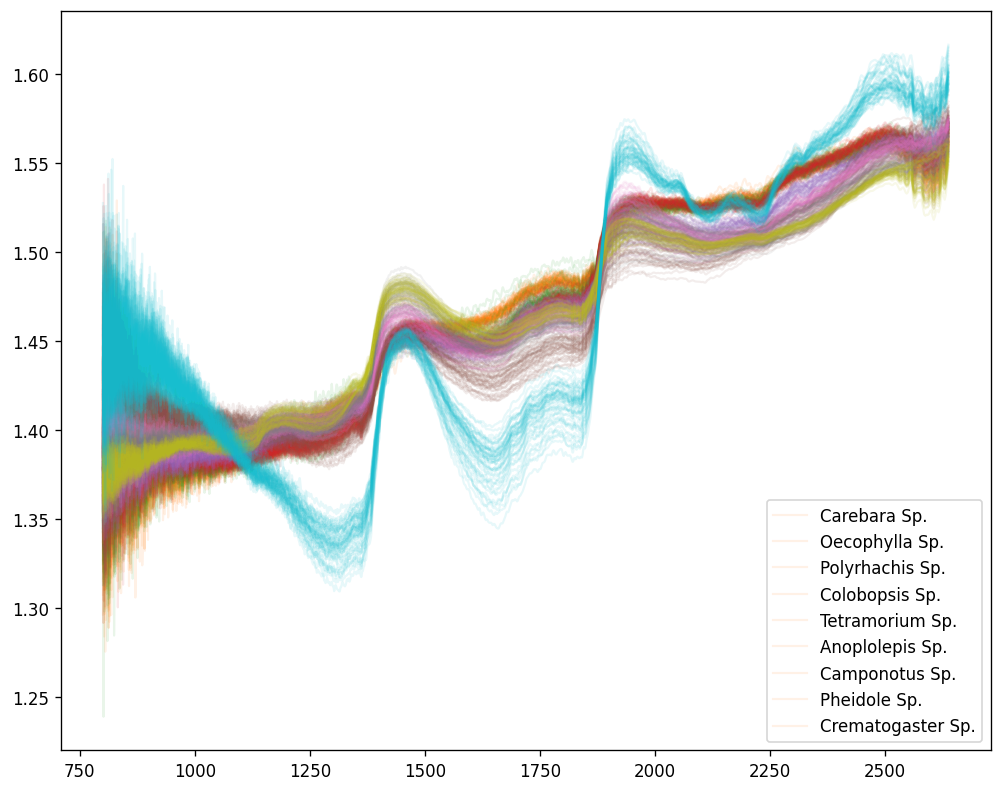

In [142]:
fig = plt.figure(dpi=120, figsize=(10,8))
plt.gcf().set_dpi(120)
plt.style.use('default')

grouped = data.groupby('species')
average = grouped.mean(numeric_only=True)
wl = list(data.columns[5:].astype('float32'))



legend = set([])
for index, row in data.iterrows():
    specie = row['species']
    i = row['classInt']
    legend.add(specie+" Sp.")
    plt.plot(wl, (row[5:]), color=colors[i], linewidth=1.3, alpha=0.1)

legend = list(legend)

plt.legend(legend)
plt.show()

PCA

C:\Users\Rosco\AppData\Local\Temp\ipykernel_10956\2284530869.py:36: MatplotlibDeprecationWarning:

The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.



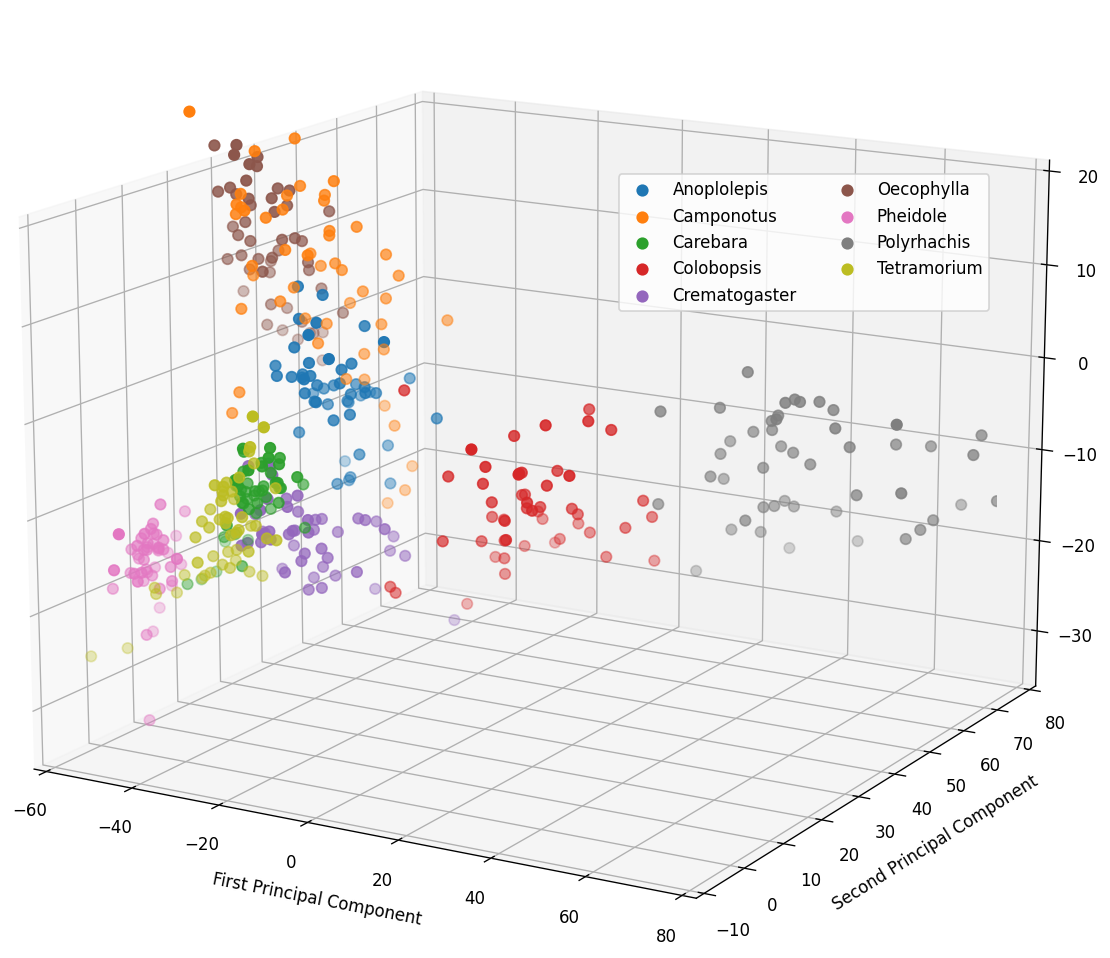

In [69]:
scaler = StandardScaler()
scaler.fit(X) 
X_scaled = scaler.transform(X)

pca = PCA(n_components=3)
pca.fit(X_scaled) 
X_pca = pca.transform(X_scaled) 

# ex_variance=np.var(X_pca,axis=0)
# ex_variance_ratio = ex_variance/np.sum(ex_variance)
# ex_variance_ratio

Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]


fig = plt.figure(figsize=(10,8))
plt.gcf().set_dpi(120)
plt.style.use('default')
ax = fig.add_subplot(111, projection='3d')

for l in np.unique(data['species']):
 ix=np.where(data['species']==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], s=40, label=l)
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=10)
ax.set_ylabel("Second Principal Component", fontsize=10)
ax.set_zlabel("Third Principal Component", fontsize=10)
ax.axes.set_xlim3d(left=-60, right=80) 
ax.axes.set_ylim3d(bottom=-10, top=80) 
ax.axes.set_zlim3d(bottom=-35, top=20) 

ax.legend(loc='right', ncols=2, bbox_to_anchor=(1, 0.75), ncol=1)
ax.elev = 15    # x rotation (default=0)
ax.dist = 8
# ax.azim= 80

# ax.invert_xaxis()
# ax.invert_yaxis()
plt.tight_layout()
# plt.savefig('PCABruker',dpi=fig.dpi)
plt.show()

PCA CUMULATIVE VARIANCE EXPLAINED

In [70]:

pca = PCA()
pca.fit(X)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)


fig = px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)
fig.update_layout(xaxis_range=[1,50], height = 400, width = 700)


INTERACTIVE PCA

In [143]:
fig = plt.figure(figsize=(8,10))

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=data['species'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=800, height=800, size=data['sizes']
)
fig.show()

<Figure size 800x1000 with 0 Axes>

LDA LOOCV

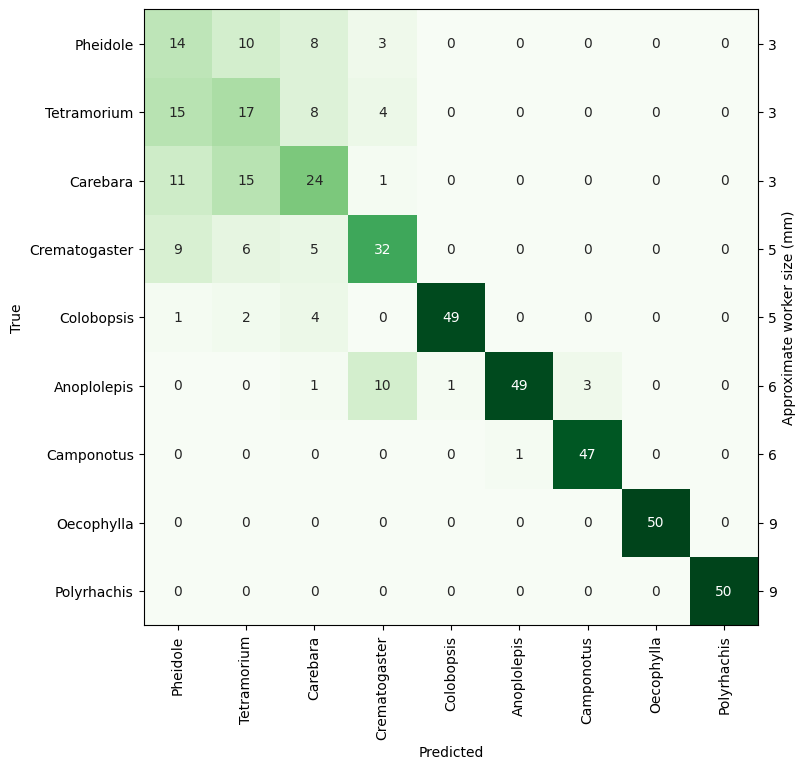

In [ ]:
lda = LDA(n_components=8)
conf_matrix = pd.DataFrame(columns=list(range(1,1+len(labels))), index=list(range(1,1+len(labels))))
conf_matrix.loc[:,:] = 0

for index, row in data.iterrows():
    
        traindata = data.drop(index, axis=0)
        ytest = row['classInt']
        ytrain = traindata['classInt']
        Xtest = row.values[3:].astype(float)
        Xtrain = traindata.values[:,3:].astype(float)

        lda.fit_transform(Xtrain, ytrain)
        ypred = lda.predict(Xtest.reshape(1, -1))

        conf_matrix.at[ypred[0], ytest] = conf_matrix.at[ypred[0], ytest] +1

        # print("species = "+ str(ytest) + ", pred =" + str(ypred[0]))


conf_matrix

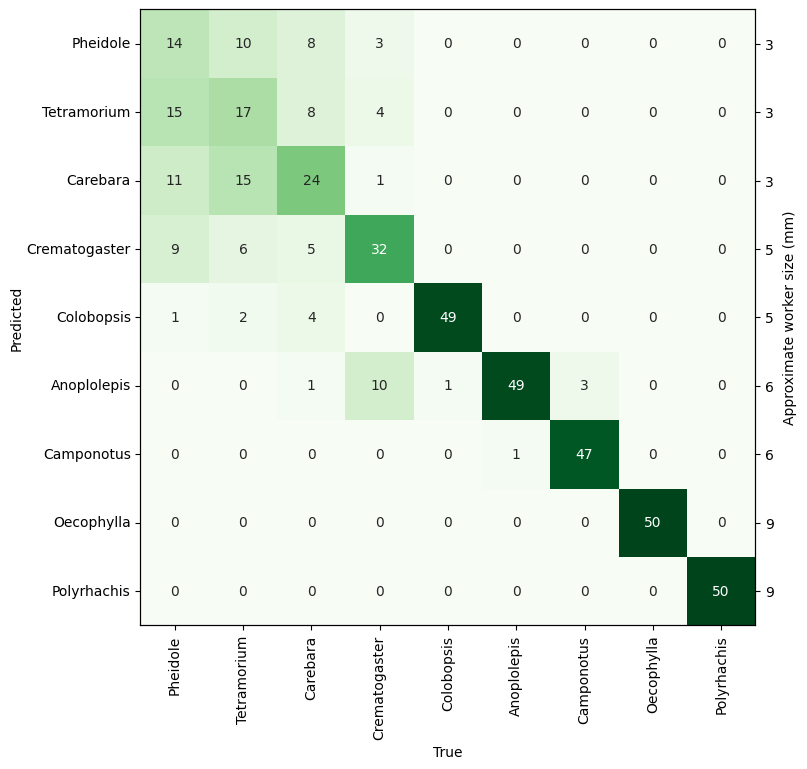

In [176]:
fig = plt.figure(dpi=100, figsize=(11.6,8))
ax1 = fig.add_subplot(111)
ax1 = sns.heatmap(conf_matrix.to_numpy().astype(int), square=True, annot=True, fmt='d', cbar=False, cmap="Greens",
            xticklabels=labels, yticklabels=labels)
ticks = ax1.get_yticks()
ax1.set_xlabel("True")

tempax = ax1.twinx()

ax2 = tempax.twiny()

ax2.set_yticks(ticks)
tempax.set_xticks(ticks)

ax2.set_ylim([9 ,0])

ax1.set_ylabel("XXX")
ax2.set_ylabel("XXX")
tempax.set_ylabel("Predicted", labelpad=-550)

ax1.set_ylabel("Approximate worker size (mm)", labelpad=20)
fig.subplots_adjust(left=0.37)
ax2.tick_params(top=False, labelright=True, labelbottom=False, labeltop=False, labelleft=False, labelrotation=0)
ax1.tick_params( labelright=False, labelbottom=True, labeltop=False, labelleft=True, labelrotation=0)
tempax.tick_params( labelright=True, labelbottom=False, labeltop=False, labelleft=False, labelrotation=0)

ax1.set_xticklabels((labels), rotation=90)
ax1.set_yticklabels(labels, rotation=00)
ax2.set_yticklabels(sizes, rotation=00)
ax1.xaxis.set_label_position('bottom')
ax1.yaxis.set_label_position('right')
ax2.xaxis.set_label_position('bottom')
ax2.yaxis.set_label_position('left')
# plt.savefig('matrxplot.png')
plt.show()

HEIRARCHICAL LDA LOOCV

In [ ]:
lda = LDA(n_components=3)
conf_matrix_H = pd.DataFrame(columns=list(range(1,1+len(labels))), index=list(range(1,1+len(labels))))
conf_matrix_H.loc[:,:] = 0

# print(conf_matrix_H)
# print("starting")
for index, row in data.iterrows():
    
        traindata = data.drop(index, axis=0)
        ytest = row['classInt']
        ytrain = traindata['classInt']
        Xtest = row.values[5:].astype(float)
        Xtrain = traindata.values[:,5:].astype(float)

        lda.fit_transform(Xtrain, ytrain) #main
        ypred = lda.predict(Xtest.reshape(1, -1))

        if ypred[0] in (1, 2, 3, 4, 5, 6) :
                
                lda = LDA(n_components=3)

                try:
                        traindata = datasmall6.drop(index, axis=0)
                except:
                        traindata = datasmall6
                
                ytest = row['classInt']
                ytrain = traindata['classInt']
                Xtest = row.values[5:].astype(float)
                Xtrain = traindata.values[:,5:].astype(float)

                lda.fit_transform(Xtrain, ytrain) #mini
                ypred = lda.predict(Xtest.reshape(1, -1))


                if ypred[0] in (1, 2, 3) :
                
                        lda = LDA(n_components=2)

                        try:
                                traindata = datasmall3.drop(index, axis=0)
                        except:
                                traindata = datasmall3
                        
                        ytest = row['classInt']
                        ytrain = traindata['classInt']
                        Xtest = row.values[5:].astype(float)
                        Xtrain = traindata.values[:,5:].astype(float)

                        lda.fit_transform(Xtrain, ytrain) #mini
                        ypred = lda.predict(Xtest.reshape(1, -1))
                        conf_matrix_H.at[ypred[0], ytest] = conf_matrix_H.at[ypred[0], ytest] +1
                        # print(str(ytest) + "," + str(ypred[0]))
                        # print(conf_matrix_H)
                
                else:

                        conf_matrix_H.at[ypred[0], ytest] = conf_matrix_H.at[ypred[0], ytest] +1
                        # print(str(ytest) + "," + str(ypred[0]))
                        # print(conf_matrix_H)
        else:

                conf_matrix_H.at[ypred[0], ytest] = conf_matrix_H.at[ypred[0], ytest] +1
                # print(str(ytest) + "," + str(ypred[0]))
                # print(conf_matrix_H)

print(conf_matrix_H)
                



    1   2   3   4   5   6   7   8   9
1  49   2   0   0   0   0   0   0   0
2   0  42   5   2   0   0   0   0   0
3   0   6  45   0   0   0   0   0   0
4   1   0   0  47   0   2   0   0   0
5   0   0   0   0  49   0   0   0   0
6   0   0   0   1   1  46   3   0   0
7   0   0   0   0   0   2  47   0   0
8   0   0   0   0   0   0   0  50   0
9   0   0   0   0   0   0   0   0  50


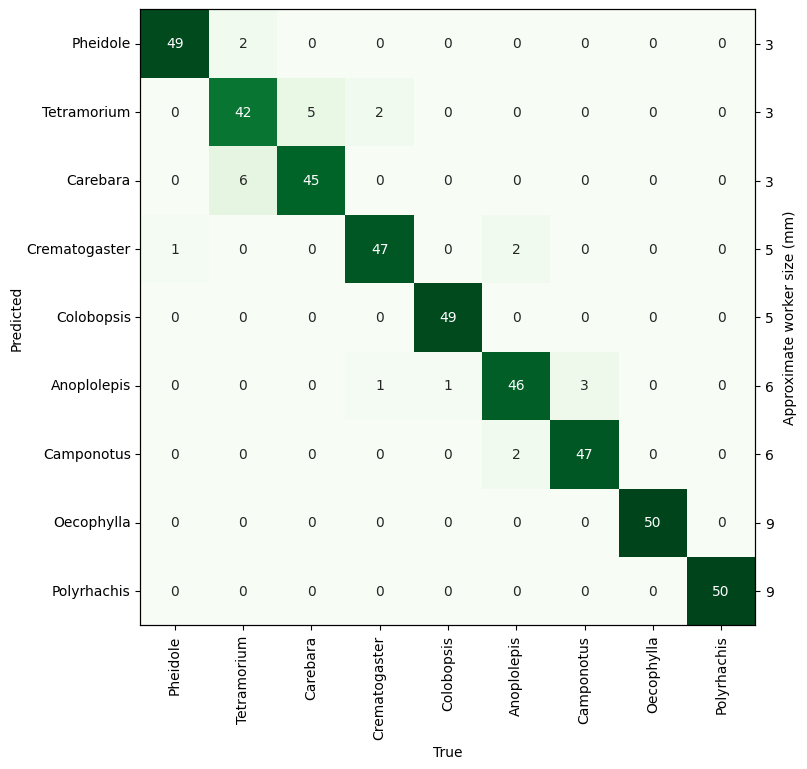

In [173]:
fig = plt.figure(dpi=100, figsize=(11.6,8))
ax1 = fig.add_subplot(111)
ax1 = sns.heatmap(conf_matrix_H.to_numpy().astype(int), square=True, annot=True, fmt='d', cbar=False, cmap="Greens",
            xticklabels=labels, yticklabels=labels)
ticks = ax1.get_yticks()
ax1.set_xlabel("True")

tempax = ax1.twinx()

ax2 = tempax.twiny()

ax2.set_yticks(ticks)
tempax.set_xticks(ticks)

ax2.set_ylim([9 ,0])

ax1.set_ylabel("XXX")
ax2.set_ylabel("XXX")
tempax.set_ylabel("Predicted", labelpad=-550)

ax1.set_ylabel("Approximate worker size (mm)", labelpad=20)
fig.subplots_adjust(left=0.37)
ax2.tick_params(top=False, labelright=True, labelbottom=False, labeltop=False, labelleft=False, labelrotation=0)
ax1.tick_params( labelright=False, labelbottom=True, labeltop=False, labelleft=True, labelrotation=0)
tempax.tick_params( labelright=True, labelbottom=False, labeltop=False, labelleft=False, labelrotation=0)

ax1.set_xticklabels((labels), rotation=90)
ax1.set_yticklabels(labels, rotation=00)
ax2.set_yticklabels(sizes, rotation=00)
ax1.xaxis.set_label_position('bottom')
ax1.yaxis.set_label_position('right')
ax2.xaxis.set_label_position('bottom')
ax2.yaxis.set_label_position('left')
# plt.savefig('matrxplot.png')
plt.show()

In [ ]:
lda = LDA(n_components=3)
conf_matrix_H = pd.DataFrame(columns=list(range(1,1+len(labels))), index=list(range(1,1+len(labels))))
conf_matrix_H.loc[:,:] = 0

for index, row in data.iterrows():
    
        traindata = data.drop(index, axis=0)
        ytest = row['classInt']
        ytrain = traindata['classInt']
        Xtest = row.values[5:].astype(float)
        Xtrain = traindata.values[:,5:].astype(float)

        lda.fit_transform(Xtrain, ytrain) #main
        ypred = lda.predict(Xtest.reshape(1, -1))

        if ypred[0] in (1, 2, 3, 4) :
                
                lda = LDA(n_components=3)

                try:
                        traindata = datasmall.drop(index, axis=0)
                except:
                        traindata = datasmall
                
                ytest = row['classInt']
                ytrain = traindata['classInt']
                Xtest = row.values[5:].astype(float)
                Xtrain = traindata.values[:,5:].astype(float)

                lda.fit_transform(Xtrain, ytrain) #mini
                ypred = lda.predict(Xtest.reshape(1, -1))

                conf_matrix_H.at[ypred[0], ytest] = conf_matrix.at[ypred[0], ytest] +1 

        else:

                conf_matrix_H.at[ypred[0], ytest] = conf_matrix.at[ypred[0], ytest] +1 

                
fig = plt.figure(dpi=100, figsize=(11.6,8))
ax1 = fig.add_subplot(111)
ax1 = sns.heatmap(conf_matrix_H.to_numpy().astype(int), square=True, annot=True, fmt='d', cbar=False, cmap="Greens",
            xticklabels=labels, yticklabels=labels)
ticks = ax1.get_yticks()
ax2 = ax1.twinx()
ax2.set_yticks(ticks)
ax2.set_ylim([9 ,0])
ax1.set_xlabel("Predicted")
ax1.set_ylabel("True")
ax2.set_xlabel("3")
ax2.set_ylabel("Approximate worker size (mm)")
fig.subplots_adjust(left=0.37)
ax1.tick_params( labelright=True, labelbottom=True, labeltop=False, labelleft=False, labelrotation=0)
ax2.tick_params( labelright=False, labelbottom=False, labeltop=True, labelleft=True, labelrotation=0)
ax1.set_xticklabels((labels), rotation=90)
ax1.set_yticklabels(labels, rotation=00)
ax2.set_yticklabels(sizes, rotation=00)
ax1.xaxis.set_label_position('bottom')
ax1.yaxis.set_label_position('right')
ax2.xaxis.set_label_position('bottom')
ax2.yaxis.set_label_position('left')
# plt.savefig('matrxplot.png')
plt.show()



FINAL ACCURACIES

In [177]:
accuracy = np.trace(conf_matrix.to_numpy().astype(int))/(9*50)
accuracy_H = np.trace(conf_matrix_H.to_numpy().astype(int))/(9*50)

print("LDA accuracy = "+ str(accuracy))
print("Heirarchical LDA accuracy = "+ str(accuracy_H))


LDA accuracy = 0.7377777777777778
Heirarchical LDA accuracy = 0.9444444444444444
